In [11]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois_2.csv')
ill.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"MetalStamp, Inc.",24219 NORTHERN ILLINOIS DRIVE,CHANNAHON,IL,60410,6388,EXEMPT,1730000,1297500,5.75,...,332116,Metal Stamping,50,OTH 7A,Guaranty,First American Bank,700 Busse Rd,ELK GROVE VILLAGE,IL,60007
1,Phillip M. Palella D.D.S. P.C.,2033 W Division St,CHICAGO,IL,60622,10922,PIF,176600,88300,7.00,...,621210,Offices of Dentists,23,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
2,"PINOY TURO-TURO, INC",1800 FAXON DR,MONTGOMERY,IL,60538,98,CHGOFF,30500,15250,9.00,...,722110,Full-Service Restaurants,10,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
3,"TURNER BAILEY, INC.",410 BROADWAY,SOUTH ROXANA,IL,62037,164,CHGOFF,800000,600000,6.00,...,562910,Remediation Services,45,OTH 7A,Guaranty,Providence Bank,3855 Forum Blvd,COLUMBIA,MO,65203
4,KB TRUCK REPAIR INC.,3641 HIGHWAY 111,PONTOON BEACH,IL,62040,8691,PIF,505000,378750,6.00,...,811310,Commercial and Industrial Machinery and Equipm...,18,OTH 7A,Guaranty,United Community Bank,301 N Main St,CHATHAM,IL,62629


In [13]:
ill =ill.dropna()

In [14]:
X = ill[["LoanStatus", "GrossApproval", "SBAGuarantee"]]
y = ill["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(483, 3) (483, 1)


In [15]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
2,30500,15250,1
3,800000,600000,1
12,125000,106250,1
17,180000,135000,1
26,50000,25000,1


In [16]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
8159,10000,9000,1
1911,25000,12500,1
8049,25000,12500,1
4436,1200000,1080000,1
8168,15000,13500,1


In [17]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [19]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuarantee"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuarantee"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

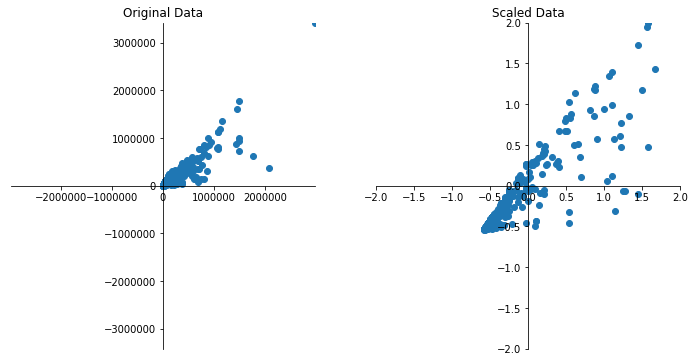

In [20]:
plt.show()

In [21]:
ill.corr()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,InterestRate,TermMonths,ApprovalFiscalYear,Status,COFiscalYear,COAmount,PrinBalanceCollected,MonthsRemainingAtCO,NaicsCode,JobsSupported,BankZip
BorrZip,1.000000,0.046423,0.014896,0.037102,-0.171682,0.112620,-0.022852,NaN,0.055700,0.000301,0.029767,0.070397,-0.037194,0.022736,0.103181
BorrID,0.046423,1.000000,0.166863,0.157875,-0.184022,0.026491,0.555338,NaN,0.971040,0.130419,0.155511,-0.150212,-0.067321,-0.011825,-0.172044
GrossApproval,0.014896,0.166863,1.000000,0.992946,-0.397531,0.504610,-0.074550,NaN,0.154172,0.892890,0.776086,0.388585,-0.078101,0.271885,0.007127
SBAGuarantee,0.037102,0.157875,0.992946,1.000000,-0.391924,0.519100,-0.099449,NaN,0.145098,0.882555,0.776265,0.396696,-0.068313,0.255324,0.027268
InterestRate,-0.171682,-0.184022,-0.397531,-0.391924,1.000000,-0.241680,0.043396,NaN,-0.188571,-0.357657,-0.304730,-0.136018,0.046502,-0.180508,-0.075872
TermMonths,0.112620,0.026491,0.504610,0.519100,-0.241680,1.000000,-0.027766,NaN,0.004826,0.454614,0.385945,0.934389,0.069713,0.067295,0.131537
ApprovalFiscalYear,-0.022852,0.555338,-0.074550,-0.099449,0.043396,-0.027766,1.000000,NaN,0.538557,-0.053698,-0.075878,0.119108,-0.073436,-0.055958,-0.217440
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COFiscalYear,0.055700,0.971040,0.154172,0.145098,-0.188571,0.004826,0.538557,NaN,1.000000,0.119069,0.145687,-0.178376,-0.041756,-0.000786,-0.193326
COAmount,0.000301,0.130419,0.892890,0.882555,-0.357657,0.454614,-0.053698,NaN,0.119069,1.000000,0.409005,0.364162,-0.040259,0.254718,-0.008562


In [23]:
X = pd.get_dummies(ill[["GrossApproval", "SBAGuarantee", "LoanStatus"]])
y = ill["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
2,30500,15250,1
3,800000,600000,1
12,125000,106250,1
17,180000,135000,1
26,50000,25000,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

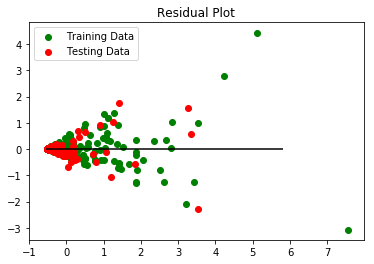

In [26]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1471909633796642, R2: 0.7701166690963451
